# Time Series Analysis for Nasdaq 100

### Author Sara Mezuri

In [1]:
# Importing the Packages

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [ ]:
# Import the NDX Stock data
data = pd.read_excel("../Data/master_data.xlsx")

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
data.set_index('Date', inplace=True)            # Set 'Date' as the index

# Check the first and last few rows
data

,NDX_Open,NDX_High,NDX_Low,NDX_Close,NDX_Volume,NDX_News_Sentiment_Score,NDX_Twitter_Sentiment_Score,SP_Open,SP_Close,SP_High,SP_Low,SP_Volume,SP_News_Sentiment_Score,SP_Twitter_Sentiment_Score
Date,,,,,,,,,,,,,,
2024-09-26,20273.30,20116.48,20273.30,19966.99,1,-0.007133,-0.014985,5762.22,5745.47,5767.37,5721.01,1,-0.007512,-0.024673
2024-09-25,19922.28,19972.61,20043.43,19921.22,83318,0.008264,0.008256,5733.65,5722.26,5741.03,5712.06,178562,0.015739,0.003237
2024-09-24,19917.56,19944.84,19984.47,19739.67,89451,0.013232,-0.005248,5727.66,5732.93,5735.32,5698.99,182050,0.013249,-0.003862
2024-09-23,19848.71,19852.20,19892.78,19797.82,80504,-0.003054,0.013247,5711.90,5718.57,5725.36,5704.22,167785,-0.002882,0.013097
2024-09-20,19816.29,19791.49,19845.70,19632.73,114619,0.024494,0.003260,5709.64,5702.55,5715.14,5674.49,248770,0.027327,0.007773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-08,4195.49,4240.55,4247.93,4192.63,60953,0.038551,0.018716,2030.61,2062.14,2064.08,2030.61,206881,0.035358,0.009673
2015-01-07,4139.85,4160.00,4169.97,4126.39,59346,0.024996,-0.008784,2005.55,2025.90,2029.61,2005.55,195982,0.029824,-0.020919
2015-01-06,4174.78,4110.83,4176.26,4090.33,63371,0.025765,-0.003190,2022.15,2002.61,2030.25,1992.44,241138,0.027856,-0.013235


## EDA and Visualisation

In [4]:
# Print the index
data.index # just to check

DatetimeIndex(['2024-09-26', '2024-09-25', '2024-09-24', '2024-09-23',
               '2024-09-20', '2024-09-19', '2024-09-18', '2024-09-17',
               '2024-09-16', '2024-09-13',
               ...
               '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12',
               '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06',
               '2015-01-05', '2015-01-02'],
              dtype='datetime64[ns]', name='Date', length=2450, freq=None)

In [5]:
# Use `shape` to get a better understanding of our dataframe 
print('Shape of the data', data.shape)

Shape of the data (2450, 14)


In [6]:
# Use `info()` method to get a summary of the DataFrame, including information about the data types, non-null values and its structure
print('Data info:')
data.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2024-09-26 to 2015-01-02
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NDX_Open                     2450 non-null   float64
 1   NDX_High                     2450 non-null   float64
 2   NDX_Low                      2450 non-null   float64
 3   NDX_Close                    2450 non-null   float64
 4   NDX_Volume                   2450 non-null   int64  
 5   NDX_News_Sentiment_Score     2450 non-null   float64
 6   NDX_Twitter_Sentiment_Score  2450 non-null   float64
 7   SP_Open                      2450 non-null   float64
 8   SP_Close                     2450 non-null   float64
 9   SP_High                      2450 non-null   float64
 10  SP_Low                       2450 non-null   float64
 11  SP_Volume                    2450 non-null   int64  
 12  SP_News_Sentiment_Score      2450 non-null   fl

In [7]:
# Use `describe()` method to generate a descriptive statistics of the numerical columns
print('Data summary:')
data.describe()

Data summary:


,NDX_Open,NDX_High,NDX_Low,NDX_Close,NDX_Volume,NDX_News_Sentiment_Score,NDX_Twitter_Sentiment_Score,SP_Open,SP_Close,SP_High,SP_Low,SP_Volume,SP_News_Sentiment_Score,SP_Twitter_Sentiment_Score
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,9726.718167,9729.123604,9796.727110,9652.213371,63017.573469,-0.000772,0.004860,3287.017649,3287.536633,3304.684184,3268.046155,204121.812245,-0.000957,0.002937
std,4536.372461,4536.273844,4569.860088,4499.169241,18279.471608,0.017504,0.028365,1012.968194,1013.262587,1018.567518,1007.403304,51511.918501,0.017587,0.030247
min,3847.120000,3947.800000,3979.090000,3787.230000,1.000000,-0.083005,-0.140162,1833.400000,1829.080000,1847.000000,1810.100000,1.000000,-0.077583,-0.161498
25%,5716.570000,5713.460000,5726.675000,5674.610000,50137.750000,-0.009274,-0.011382,2415.635000,2415.257500,2430.140000,2399.390000,174469.250000,-0.009863,-0.014200
50%,7959.755000,7966.825000,8005.495000,7913.830000,60161.000000,-0.001819,0.005470,2973.945000,2975.975000,2986.605000,2957.905000,193506.500000,-0.002653,0.003487
75%,13474.450000,13488.465000,13571.847500,13362.475000,73495.750000,0.005488,0.021754,4154.505000,4155.327500,4176.160000,4126.260000,221443.000000,0.005127,0.020713
max,20661.410000,20675.380000,20690.970000,20479.940000,157545.000000,0.069157,0.168240,5762.220000,5745.470000,5767.370000,5721.010000,515137.000000,0.076518,0.172168


In [8]:
# Check for missing values
data.isnull().sum()  # this counts the missing values in each column

NDX_Open                       0
NDX_High                       0
NDX_Low                        0
NDX_Close                      0
NDX_Volume                     0
NDX_News_Sentiment_Score       0
NDX_Twitter_Sentiment_Score    0
SP_Open                        0
SP_Close                       0
SP_High                        0
SP_Low                         0
SP_Volume                      0
SP_News_Sentiment_Score        0
SP_Twitter_Sentiment_Score     0
dtype: int64

In [9]:
# Print the columns of the dataset
print(data.columns)

Index(['NDX_Open', 'NDX_High', 'NDX_Low', 'NDX_Close', 'NDX_Volume',
       'NDX_News_Sentiment_Score', 'NDX_Twitter_Sentiment_Score', 'SP_Open',
       'SP_Close', 'SP_High', 'SP_Low', 'SP_Volume', 'SP_News_Sentiment_Score',
       'SP_Twitter_Sentiment_Score'],
      dtype='object')


In [10]:
# Create a data frame with the closing price 
close_price= pd.DataFrame({'NDX Close': data['NDX_Close']})
close_price.head()

,NDX Close
Date,
2024-09-26,19966.99
2024-09-25,19921.22
2024-09-24,19739.67
2024-09-23,19797.82
2024-09-20,19632.73


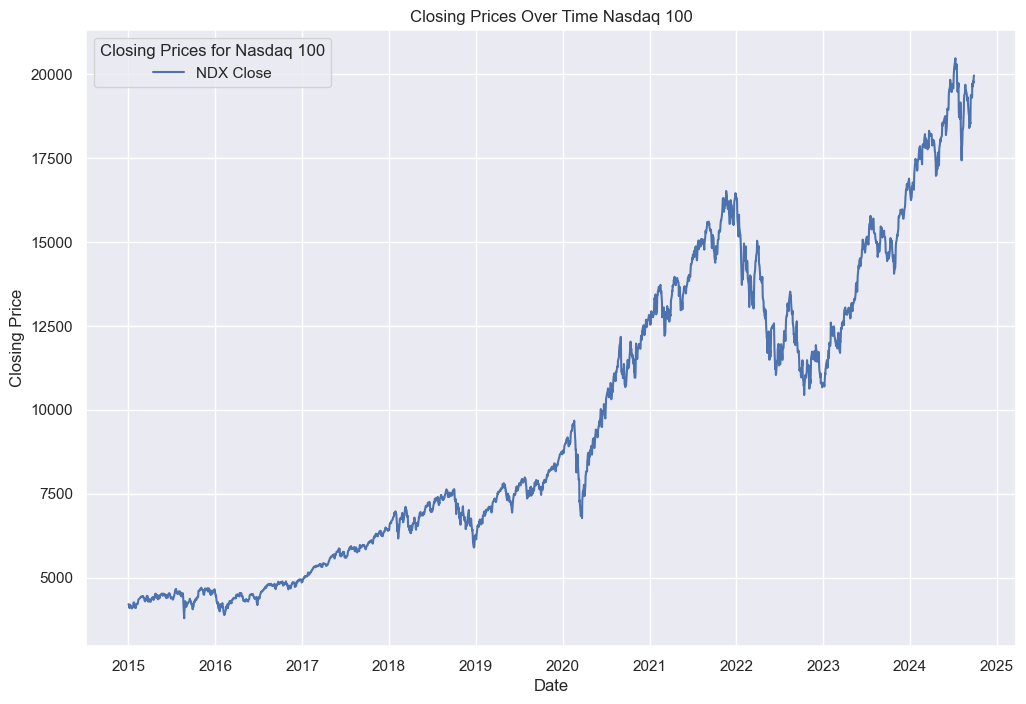

In [11]:
# Plotting closing prices 
plt.figure(figsize=(12, 8))
sns.lineplot(data=close_price)
plt.title('Closing Prices Over Time Nasdaq 100')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Closing Prices for Nasdaq 100')
plt.show()

In [12]:
# Create a data frame with the sentiments for both indices
sentiment= pd.DataFrame({'NDX News Sentiment': data['NDX_News_Sentiment_Score'], 
                           'NDX Twitter Sentiment': data['NDX_Twitter_Sentiment_Score'], 
                        })
sentiment.head()

,NDX News Sentiment,NDX Twitter Sentiment
Date,,
2024-09-26,-0.007133,-0.014985
2024-09-25,0.008264,0.008256
2024-09-24,0.013232,-0.005248
2024-09-23,-0.003054,0.013247
2024-09-20,0.024494,0.003260


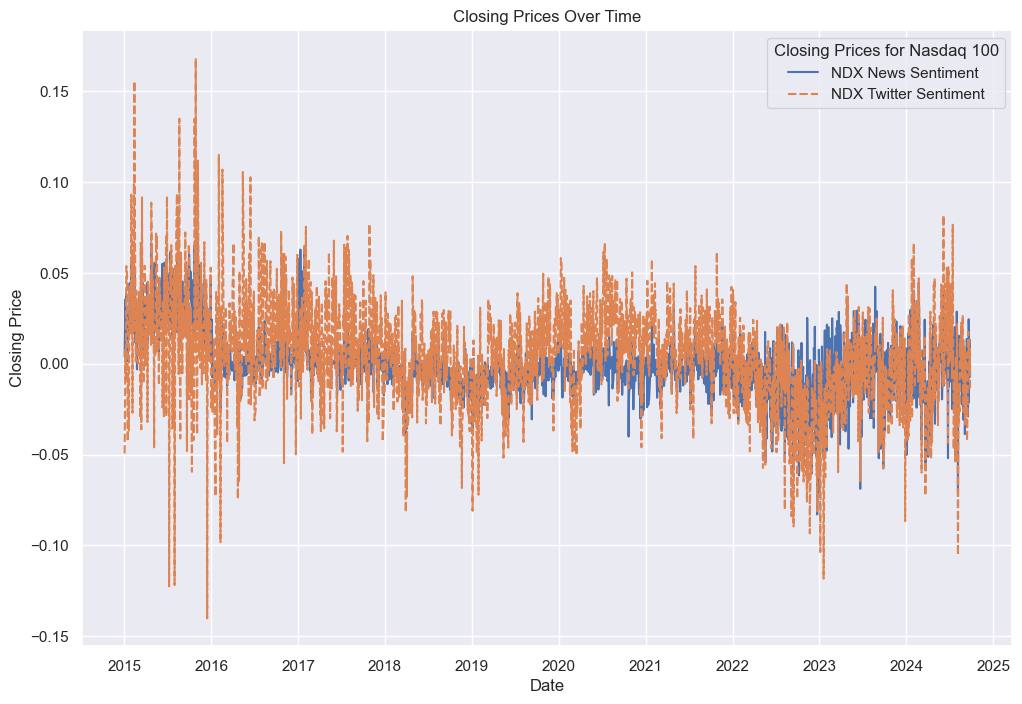

In [13]:
# Plotting closing prices and the sentiments for Nasdaq 100
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Closing Prices for Nasdaq 100')
plt.show()

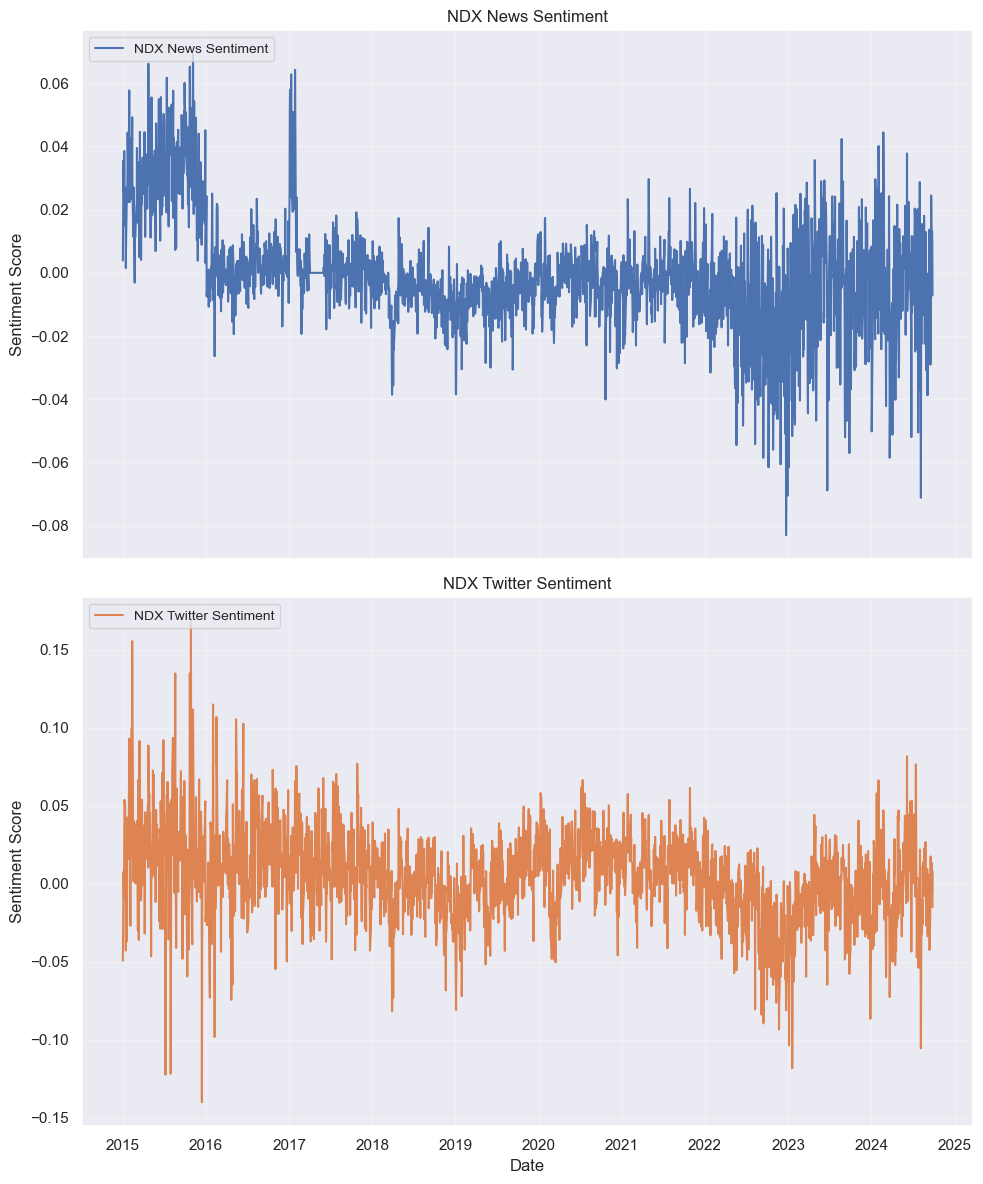

In [14]:
# Plot each sentiment in a different subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)

# Titles for each subplot
titles = ['NDX News Sentiment', 'NDX Twitter Sentiment']

# Loop through each column and plot
for i, column in enumerate(sentiment.columns):
    axes[i].plot(sentiment.index, sentiment[column], label=column, color=f"C{i}")  # Use default colors
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].grid(True, linestyle='-', alpha=0.3)  # Simple gridline
    axes[i].legend(loc='upper left', fontsize=10)
    axes[i].set_ylabel("Sentiment Score")

# Add common x-axis label
plt.xlabel("Date", fontsize=12)
plt.tight_layout()
plt.show()

## Time Series Analysis

In [15]:
# Create a data series for the closing prices
ndx_time_series = pd.Series(data['NDX_Close'])
ndx_time_series.head()

Date
2024-09-26    19966.99
2024-09-25    19921.22
2024-09-24    19739.67
2024-09-23    19797.82
2024-09-20    19632.73
Name: NDX_Close, dtype: float64

### Preprocessing Time Series Data

Transforming data can help reveal patterns and prepare it for analysis. Common techniques include:

**Smoothing:** Reduces noise in the data using methods like moving averages.

**Differencing:** Removes trends and seasonality to make the data stationary.

**Scaling and Normalization:** Adjusts data to a specific range, improving model performance.

In [16]:
# Moving average smoothing
moving_avg = ndx_time_series.rolling(window=5).mean()

# Differencing
differenced_series = ndx_time_series.diff().dropna()

# Scaling
scaler = StandardScaler()
scaled_series = scaler.fit_transform(ndx_time_series.values.reshape(-1, 1))

# Preparing the data for seasonal plot
ndx_monthly = ndx_time_series.resample('M').mean()

### Visualization Techniques
Visualizing time series data is key to understanding its patterns and behavior. Common methods include:

**Line Plots:** A simple and effective way to display time series trends over time.

**Seasonal Plots:** Useful for spotting recurring seasonal patterns.

**Autocorrelation Plots:** Helps analyze how current values relate to past values in the series.

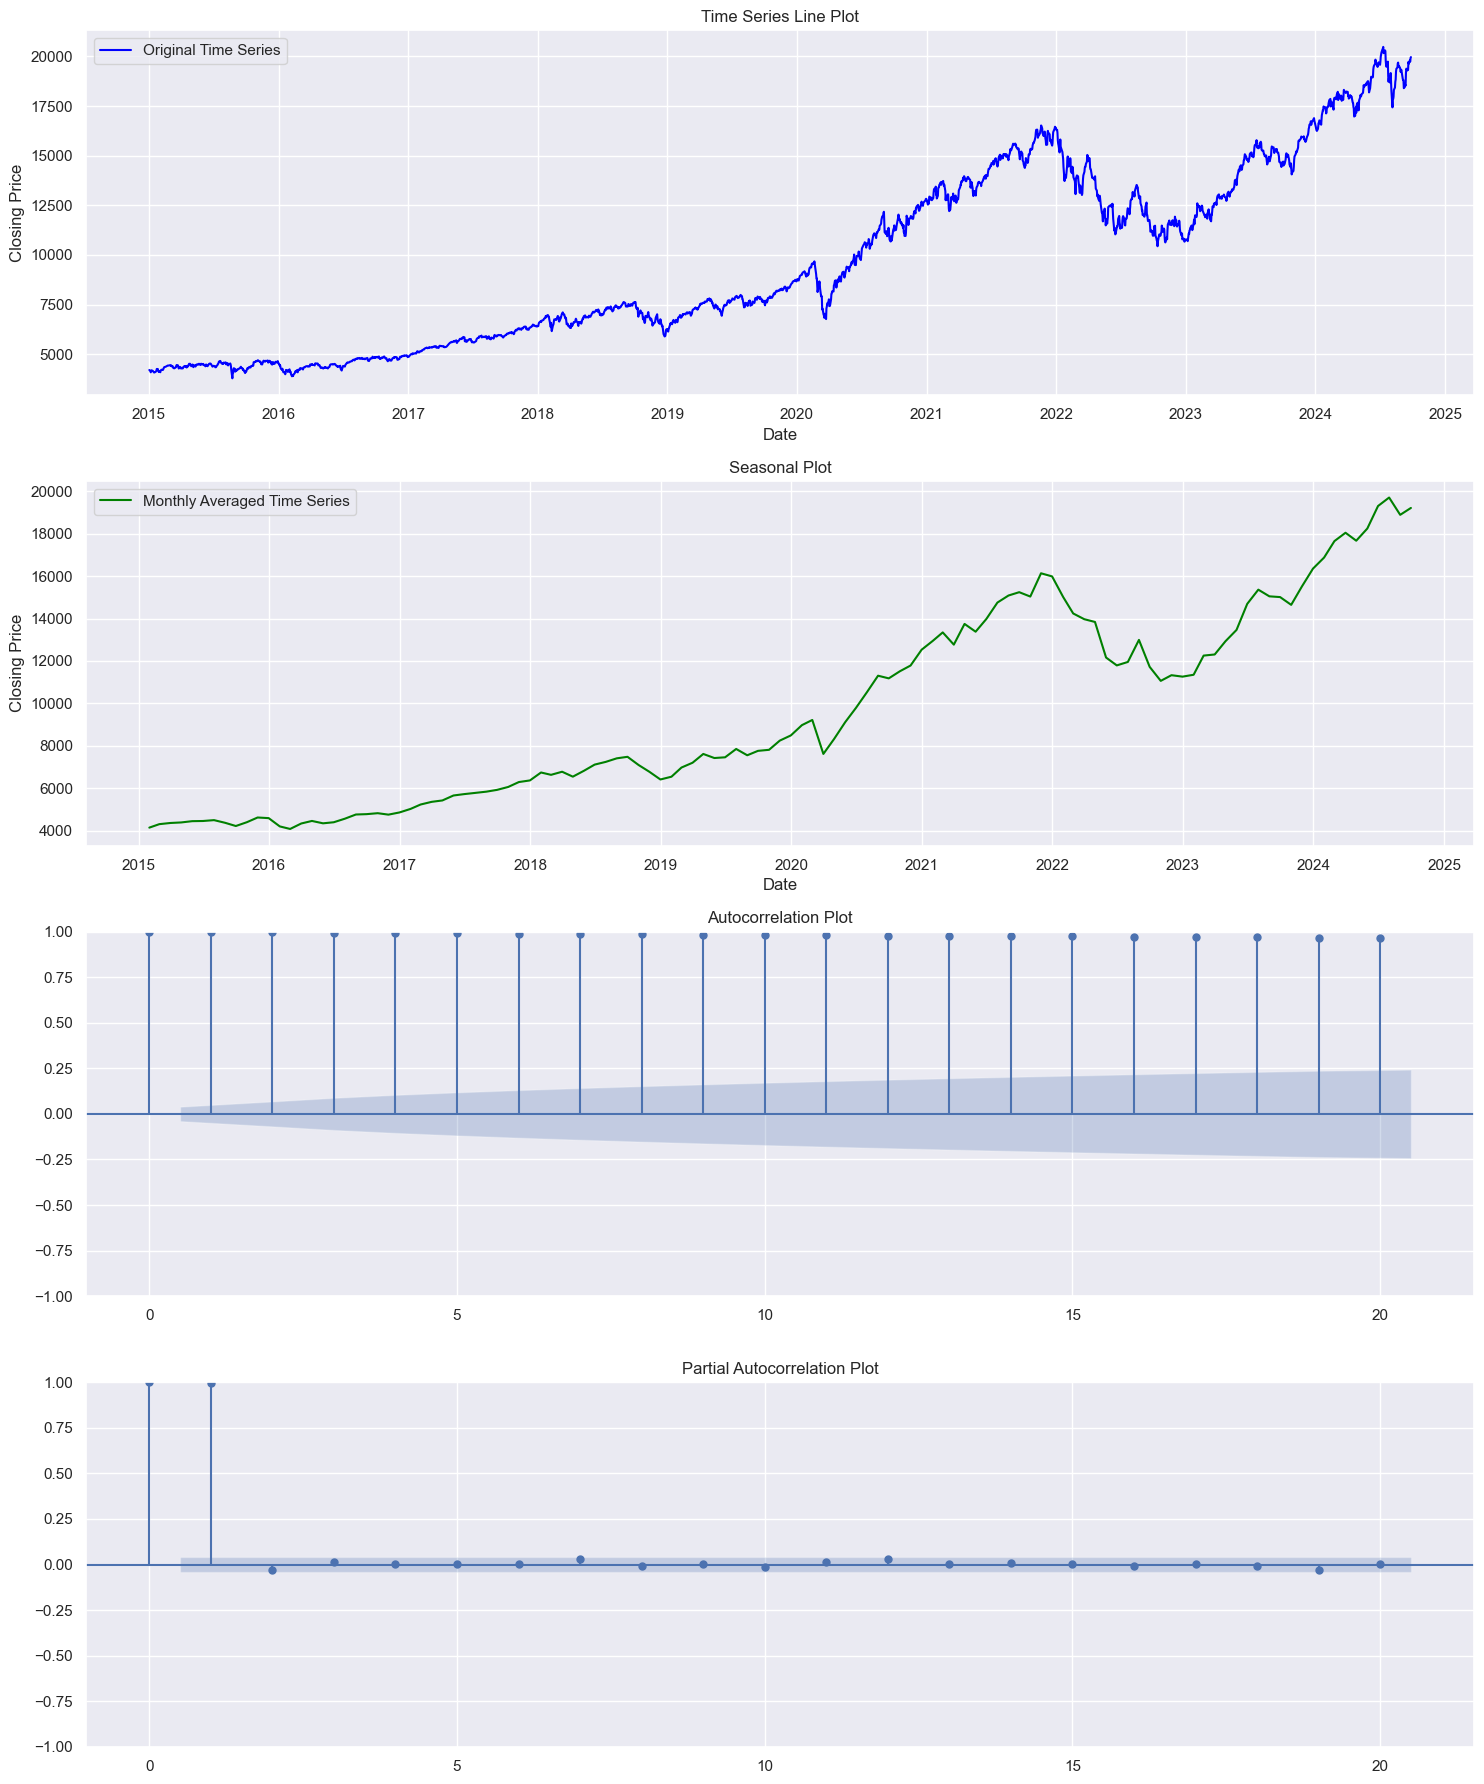

In [17]:
# Plotting
plt.figure(figsize=(15, 18))

# Line plot
plt.subplot(4, 1, 1)
plt.plot(ndx_time_series, label='Original Time Series', color='blue')
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Seasonal plot
plt.subplot(4, 1, 2)
plt.plot(ndx_monthly, label='Monthly Averaged Time Series', color='green')
plt.title('Seasonal Plot')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Autocorrelation plot
plt.subplot(4, 1, 3)
cleaned_time_series = ndx_time_series.dropna()
plot_acf(cleaned_time_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Plot')
plt.grid(True)

# Partial autocorrelation plot
plt.subplot(4, 1, 4)
plot_pacf(cleaned_time_series, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

## Splitting the Data

Splits the dataset into training and testing sets.

80% of the data is used for training, while 20% is reserved for testing.

In [18]:
# Split the dataset into training (80%) and testing(20%)
size = int(len(ndx_time_series)*0.2)
ndx_time_series_train, ndx_time_series_test = ndx_time_series.iloc[size:], ndx_time_series.iloc[:size]

In [19]:
ndx_time_series_test # Check the start and end date

Date
2024-09-26    19966.99
2024-09-25    19921.22
2024-09-24    19739.67
2024-09-23    19797.82
2024-09-20    19632.73
                ...   
2022-10-20    11001.28
2022-10-19    11008.11
2022-10-18    11035.80
2022-10-17    10959.75
2022-10-14    10677.48
Name: NDX_Close, Length: 490, dtype: float64

## Model Building and Forecasting

An Auto-ARIMA model is fitted on the closing price data. Auto-ARIMA automatically selects the best ARIMA(p, d, q) parameters based on a chosen information criterion (e.g., AIC or BIC).

### Arguments for the Auto-ARIMA

* *exogenous*: External variables or factors to include in the model.
* *m:* The length of the seasonal cycle.
* *max_order*: The maximum combined number of AR (p) and MA (q) terms allowed in the model.
* *max_p:* The maximum number of autoregressive (AR) terms.
* *max_q:* The maximum number of moving average (MA) terms.
* *max_d:* The maximum number of differencing steps for making the series stationary.
* *maxiter:* The maximum number of iterations allowed for the model to converge; higher orders may require more iterations.
alpha: The significance level for hypothesis testing; default is 0.05 (5%), which is typically sufficient.
* *n_jobs:* The number of models to fit simultaneously; use -1 to leverage all available cores.
trend: Specifies the trend components; "ct" (constant and trend) is commonly used.
* *information_criterion:* Criteria for model selection, such as:
    * *aic:* Akaike Information Criterion
    * *aicc:* Corrected Akaike Information Criterion
    * *bic:* Bayesian Information Criterion
    * *hqic:* Hannan-Quinn Information Criterion
* *oob:* "Out of bag," for validation scoring.
* *out_of_sample:* Specifies the portion of the dataset (e.g., 20%) used for validation during model selection.

In [20]:

ndx_auto = auto_arima(ndx_time_series_train, 
                        m=5, 
                        max_p=5, max_q=5, max_d=2, 
                        information_criterion='aic')  # Optimize using AIC

In [21]:
print(ndx_auto.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1960
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood              -12160.702
Date:                           Sun, 01 Dec 2024   AIC                          24327.404
Time:                                   23:56:11   BIC                          24344.145
Sample:                                        0   HQIC                         24333.558
                                          - 1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1335      0.013      9.934      0.000       0.107       0.160
ma.S.L5       -0.0348      0.015     -2.328

### Model Summary:

The SARIMAX model results indicate a decent fit, with key components like AR and MA terms being statistically significant. 

**AIC, BIC, and HQIC** are relatively low, suggesting a good balance between model fit and complexity.

**AR(1), AR(2), MA(1), and MA(2)** are significant, showing strong model components.

The **Ljung-Box test** (p = 0.84) indicates no autocorrelation in residuals, which is good.

**Jarque-Bera test** (p = 0.00) shows the residuals aren't normally distributed, suggesting the model doesn't fully capture the data's patterns.

**Intercept and drift** are not significant (p > 0.05), meaning they don't contribute much to the model.
Overall, the model seems reasonable. 

### Fitting the model

In [22]:
# Define the SARIMAX model with the specified components
ndx_sarima = sm.tsa.SARIMAX(ndx_time_series_train, 
                       order=(2, 1, 2),  # AR(2), I(1), MA(2)
                       seasonal_order=(1, 0, 1, 5),  # Seasonal AR(1), MA(1), period of 5
                       trend='ct',  # Include constant and trend
                       enforce_stationarity=False)  # Optional: to allow non-stationary components

# Fit the model
ndx_fit = ndx_sarima.fit(disp=False)

# Access the fitted parameters using 
ndx_fit.params

intercept       -2.004380
drift           -0.001082
ar.L1            0.030418
ar.L2           -0.397381
ma.L1            0.102532
ma.L2            0.373629
ar.S.L5          0.391849
ma.S.L5         -0.450373
sigma2       14090.365975
dtype: float64

### Forecasting

In [23]:
# Forecast the model
ndx_forecast = ndx_fit.get_forecast(steps=len(ndx_time_series_test))
ndx_forecast_series = ndx_forecast.predicted_mean
ndx_forecast_ci = ndx_forecast.conf_int()

In [24]:
# Set the forecasted series index to match the test data index
ndx_forecast_series.index = ndx_time_series_test.index
ndx_forecast_series.index

DatetimeIndex(['2024-09-26', '2024-09-25', '2024-09-24', '2024-09-23',
               '2024-09-20', '2024-09-19', '2024-09-18', '2024-09-17',
               '2024-09-16', '2024-09-13',
               ...
               '2022-10-27', '2022-10-26', '2022-10-25', '2022-10-24',
               '2022-10-21', '2022-10-20', '2022-10-19', '2022-10-18',
               '2022-10-17', '2022-10-14'],
              dtype='datetime64[ns]', name='Date', length=490, freq=None)

## Model Evaluation

In [25]:
# Calculate the metrics
ndx_mae = mean_absolute_error(ndx_time_series_test, ndx_forecast_series)
ndx_mse = mean_squared_error(ndx_time_series_test, ndx_forecast_series)
ndx_rmse = np.sqrt(ndx_mse)

print(f"MAE: {ndx_mae}")
print(f"MSE: {ndx_mse}")
print(f"RMSE: {ndx_rmse}")

MAE: 12476.499533290511
MSE: 159883473.66741663
RMSE: 12644.503693993554


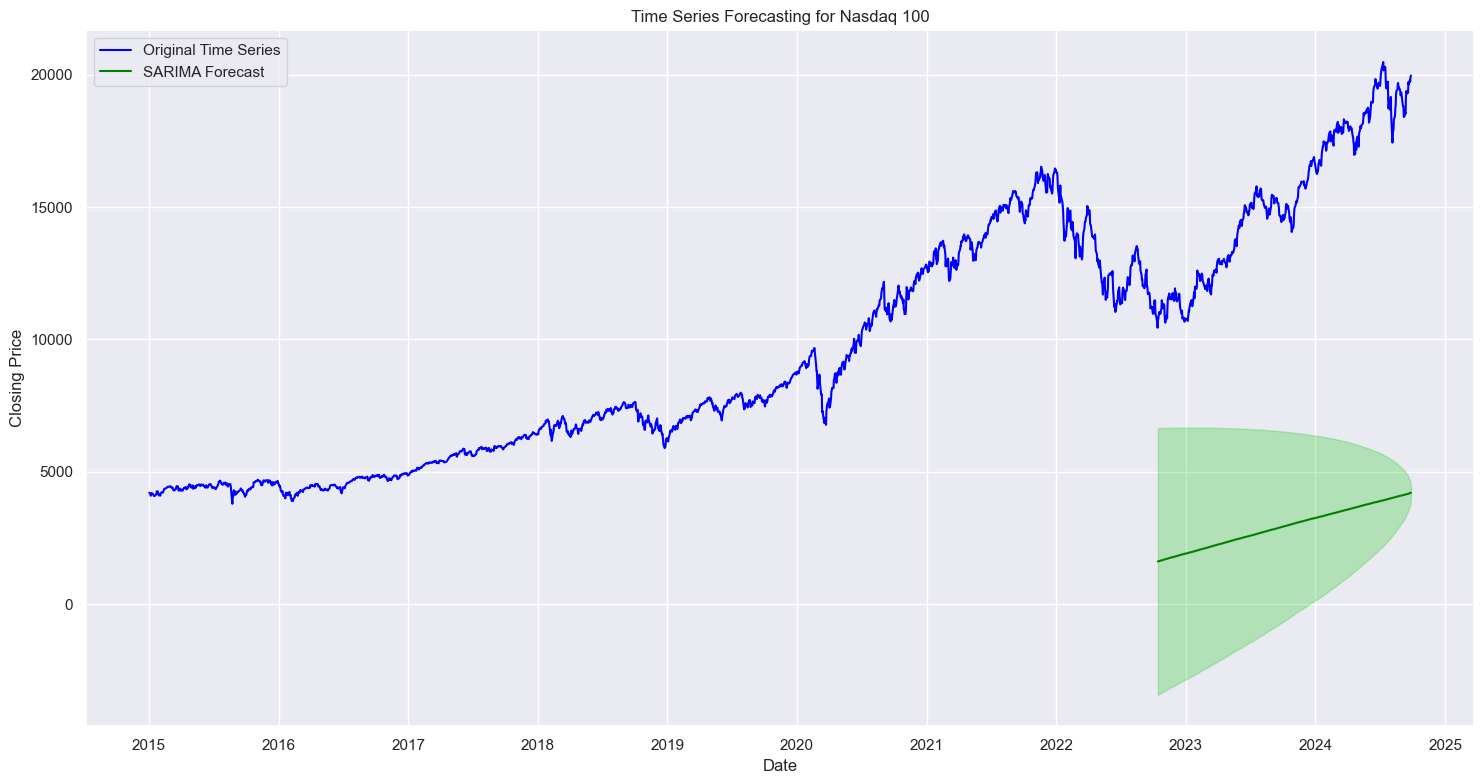

In [26]:
# Plotting the Forecast 
plt.figure(figsize=(15, 8))
plt.plot(ndx_time_series, label='Original Time Series', color='blue')
plt.plot(ndx_forecast_series.index, ndx_forecast_series, label='SARIMA Forecast', color='green')
plt.fill_between(ndx_forecast_series.index, ndx_forecast_ci.iloc[:, 0], ndx_forecast_ci.iloc[:, 1], color='limegreen', alpha=0.3)
plt.title('Time Series Forecasting for Nasdaq 100')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The forecast shows a good alignment with the overall trend of the original time series, capturing long-term growth but with some uncertainty. The widening confidence intervals indicate increasing forecast uncertainty as the prediction extends. The model performs well for capturing the long-term trend but may not capture short-term fluctuations effectively.

To improve the forecast, let's add the news and twitter sentiment as exogenous variables to see if we get better accuracy.

## Time Series Analysis with sentiment score as exogenous

In [27]:
# Split the sentiment data into training (80%) and testing(20%)
size = int(len(sentiment)*0.2)
sentiment_train, sentiment_test = sentiment.iloc[size:], sentiment.iloc[:size]

In [28]:
sentiment_test['NDX News Sentiment'] # Check the start and end date

Date
2024-09-26   -0.007133
2024-09-25    0.008264
2024-09-24    0.013232
2024-09-23   -0.003054
2024-09-20    0.024494
                ...   
2022-10-20   -0.018234
2022-10-19    0.002494
2022-10-18    0.011483
2022-10-17   -0.019662
2022-10-14    0.003950
Name: NDX News Sentiment, Length: 490, dtype: float64

In [29]:
#Fit an Auto Arima using sentiments
ndx_auto_sentiment = auto_arima(ndx_time_series_train, 
                        exogenous = sentiment_train[['NDX News Sentiment', 'NDX Twitter Sentiment']],
                        m=5, 
                        max_p=5, max_q=5, max_d=2, 
                        information_criterion='aic')  # Optimize using AIC


In [30]:
print(ndx_auto_sentiment.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1960
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood              -12160.702
Date:                           Sun, 01 Dec 2024   AIC                          24327.404
Time:                                   23:56:43   BIC                          24344.145
Sample:                                        0   HQIC                         24333.558
                                          - 1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1335      0.013      9.934      0.000       0.107       0.160
ma.S.L5       -0.0348      0.015     -2.328

Both models are identical in terms of their parameters, log-likelihood, and evaluation metrics (AIC, BIC, HQIC). The coefficients are exactly the same, as are the diagnostic tests (Ljung-Box, Jarque-Bera, etc.). There’s no difference in performance or results between the two models.

In [31]:
# Define the SARIMAX model with the specified components
ndx_sarima_sentiment = sm.tsa.SARIMAX(ndx_time_series_train,
                       exogenous = sentiment_train[['NDX News Sentiment', 'NDX Twitter Sentiment']],
                       order=(2, 1, 2),  # AR(2), I(1), MA(2)
                       seasonal_order=(1, 0, 1, 5),  # Seasonal AR(1), MA(1), period of 5
                       trend='ct',  # Include constant and trend
                       enforce_stationarity=False)  # Optional: to allow non-stationary components

# Fit the model
ndx_fit_sentiment = ndx_sarima_sentiment.fit(disp=False)

# Access the fitted parameters using 
ndx_fit_sentiment.params

intercept       -2.004380
drift           -0.001082
ar.L1            0.030418
ar.L2           -0.397381
ma.L1            0.102532
ma.L2            0.373629
ar.S.L5          0.391849
ma.S.L5         -0.450373
sigma2       14090.365975
dtype: float64

In [32]:
# Forecast the model
ndx_forecast_sentiment = ndx_fit.get_forecast(steps=len(ndx_time_series_test))
ndx_forecast_series_sentiment = ndx_forecast_sentiment.predicted_mean
ndx_forecast_ci_sentiment = ndx_forecast_sentiment.conf_int()

In [33]:
# Set the forecasted series index to match the test data index
ndx_forecast_series_sentiment.index = ndx_time_series_test.index
ndx_forecast_series_sentiment.index

DatetimeIndex(['2024-09-26', '2024-09-25', '2024-09-24', '2024-09-23',
               '2024-09-20', '2024-09-19', '2024-09-18', '2024-09-17',
               '2024-09-16', '2024-09-13',
               ...
               '2022-10-27', '2022-10-26', '2022-10-25', '2022-10-24',
               '2022-10-21', '2022-10-20', '2022-10-19', '2022-10-18',
               '2022-10-17', '2022-10-14'],
              dtype='datetime64[ns]', name='Date', length=490, freq=None)

In [34]:
# Calculate the metrics
ndx_mae_sentiment = mean_absolute_error(ndx_time_series_test, ndx_forecast_series_sentiment)
ndx_mse_sentiment = mean_squared_error(ndx_time_series_test, ndx_forecast_series_sentiment)
ndx_rmse_sentiment = np.sqrt(ndx_mse_sentiment)

print(f"MAE: {ndx_mae_sentiment}")
print(f"MSE: {ndx_mse_sentiment}")
print(f"RMSE: {ndx_rmse_sentiment}")

MAE: 12476.499533290511
MSE: 159883473.66741663
RMSE: 12644.503693993554


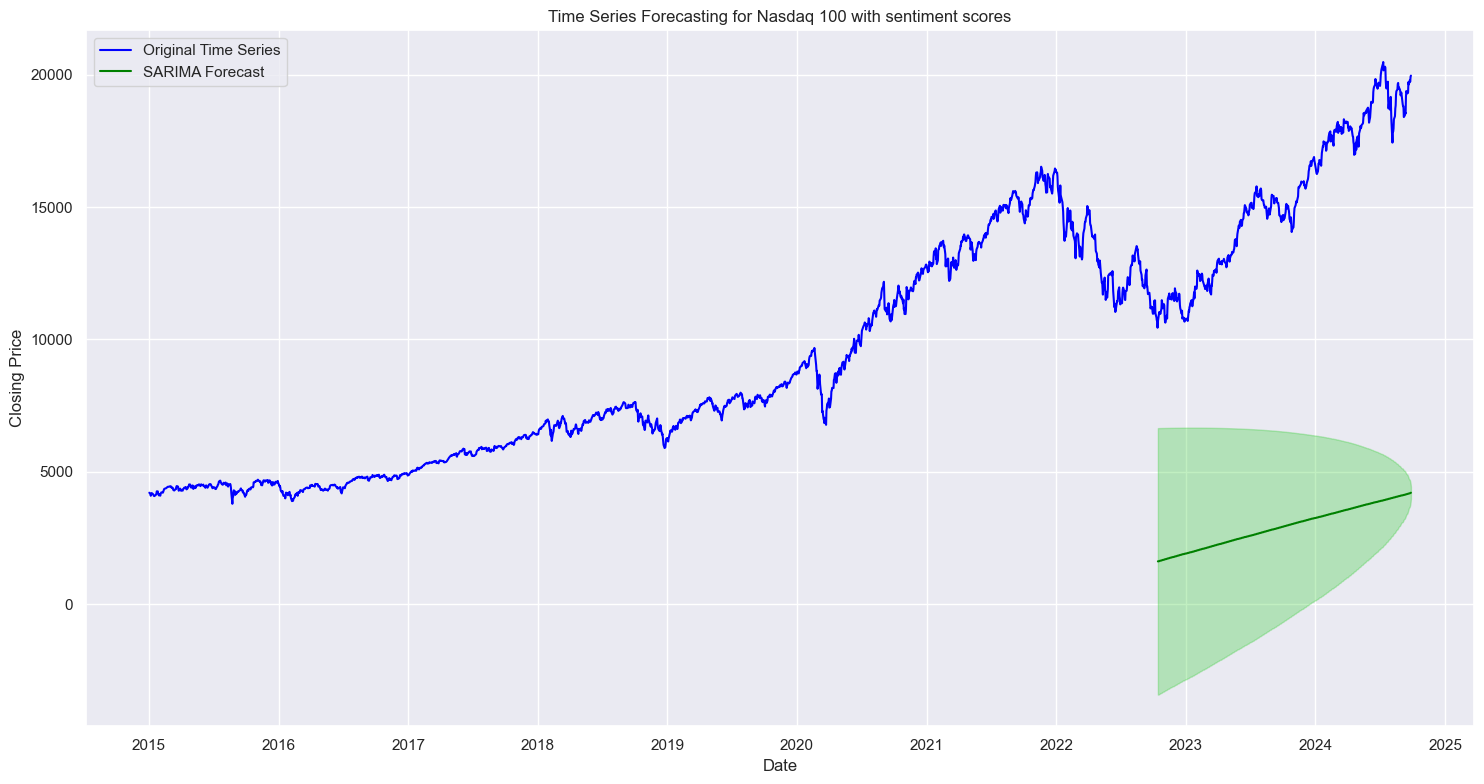

In [35]:
# Plotting the Forecast
plt.figure(figsize=(15, 8))
plt.plot(ndx_time_series, label='Original Time Series', color='blue')
plt.plot(ndx_forecast_series_sentiment.index, ndx_forecast_series_sentiment, label='SARIMA Forecast', color='green')
plt.fill_between(ndx_forecast_series_sentiment.index, ndx_forecast_ci_sentiment.iloc[:, 0], ndx_forecast_ci_sentiment.iloc[:, 1], color='limegreen', alpha=0.3)
plt.title('Time Series Forecasting for Nasdaq 100 with sentiment scores')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Thus adding the sentiment score did not affect out time series at all. 
This form has no predictive power for short-term stock trading, as it merely forecasts tomorrow's price to be the same as today's.